# Exploratory Data Analysis - EDA
Este análisis exploratorio de datos se hará sobre uno de los tres archivos parquet producidos en el proceso de ETL previo; específicamente el que corresponde al catalogo de juegos de STEAM, a saber, 'Clean_output_steam_games.parquet'.

Lo anterior en razón de la decición de tomar la opción de crear un sistema de recomendación item-item como Modelo de Aprendizaje Automático; donde se desarrolla una función que recibe el id de un producto, y como resultado devuelve una lista con 5 juegos recomendados similares al ingresado.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga el archivo Parquet 'Clean_output_steam_games.parquet' en DataFrame 'df'
df = pd.read_parquet('../Datasets/Clean_Parquet_Data_Steam/Clean_output_steam_games.parquet')

# Verifica valores nulos en el DataFrame
print("Valores nulos...")
print(df.isnull().sum())
print("----------------------")
# Estadísticas descriptivas de las columnas numéricas
print("df.describe()...", df.describe())
print("----------------------")
# Conteo de valores únicos en las columnas categóricas
print("df['genres'].value_counts()...")
print(df['genres'].value_counts())
print("----")
print("df['specs'].value_counts()...")
print(df['specs'].value_counts())
print("----")
print("df['developer'].value_counts()...")
print(df['developer'].value_counts())
print("----")
print("df['id'].value_counts()...")
print(df['id'].value_counts())
print("----------------------")
# Presenta las primeras y últimas filas del contenido del DataFrame df2
df


Valores nulos...
genres             0
app_name           0
release_date       0
specs              0
price           1308
early_access       0
id                 0
developer          0
dtype: int64
----------------------
df.describe()...               price
count  21221.000000
mean       9.518578
std       15.716350
min        0.490000
25%        2.990000
50%        5.990000
75%        9.990000
max      995.000000
----------------------
df['genres'].value_counts()...
genres
Action                                                                 1576
Action, Indie                                                          1396
Simulation                                                             1266
Strategy                                                                931
Action, Adventure, Indie                                                926
                                                                       ... 
Action, Adventure, Casual, Indie, Racing, Simulation, Sports     

,genres,app_name,release_date,specs,price,early_access,id,developer
0,"Action, Casual, Indie, Simulation, Strategy",Lost Summoner Kitty,2018-01-04,Single-player,4.99,False,761140,Kotoshiro
1,"Free to Play, Indie, RPG, Strategy",Ironbound,2018-01-04,"Single-player, Multi-player, Online Multi-Play...",NaN,False,643980,Secret Level SRL
2,"Casual, Free to Play, Indie, Simulation, Sports",Real Pool 3D - Poolians,2017-07-24,"Single-player, Multi-player, Online Multi-Play...",NaN,False,670290,Poolians.com
3,"Action, Adventure, Casual",弹炸人2222,2017-12-07,Single-player,0.99,False,767400,彼岸领域
4,"Action, Adventure, Simulation",Battle Royale Trainer,2018-01-04,"Single-player, Steam Achievements",3.99,False,772540,Trickjump Games Ltd
...,...,...,...,...,...,...,...,...
22524,"Action, Adventure, Casual, Indie",Kebab it Up!,2018-01-04,"Single-player, Steam Achievements, Steam Cloud",1.99,False,745400,Bidoniera Games
22525,"Casual, Indie, Simulation, Strategy",Colony On Mars,2018-01-04,"Single-player, Steam Achievements",1.99,False,773640,"Nikita ""Ghost_RUS"""
22526,"Casual, Indie, Strategy",LOGistICAL: South Africa,2018-01-04,"Single-player, Steam Achievements, Steam Cloud...",4.99,False,733530,Sacada
22527,"Indie, Racing, Simulation",Russian Roads,2018-01-04,"Single-player, Steam Achievements, Steam Tradi...",1.99,False,610660,Laush Dmitriy Sergeevich


#### Caja & Bigotes para 'price'

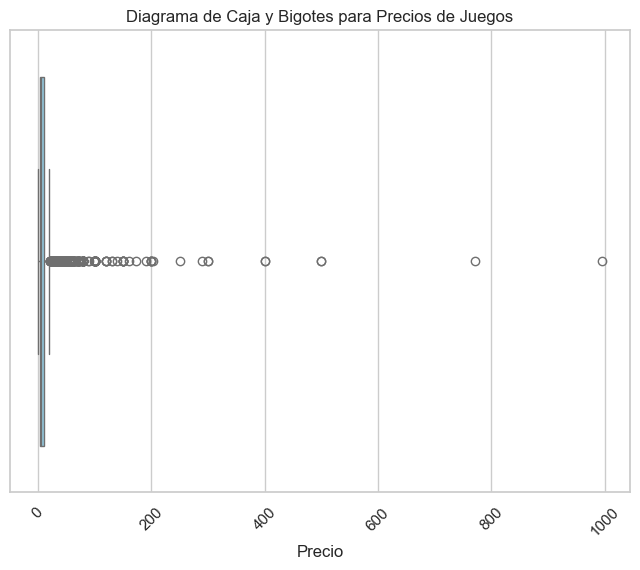

In [2]:
# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de caja y bigotes para 'price' con Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'], color='skyblue')

# Configuración adicional para resaltar los outliers
plt.title('Diagrama de Caja y Bigotes para Precios de Juegos')
plt.xlabel('Precio')
plt.xticks(rotation=45)
plt.show()

# Análisis de resultados del EDA y Conclusiones
Basándome en los resultados del Exploratory Data Analysis (EDA) previo, hay algunas observaciones y conclusiones que influiran en las decisiones para la creación del modelo de recomendación:

1. Valores nulos en la columna 'price': Se observa que la columna 'price' tiene 1308 valores nulos. Esto indica que no todos los juegos tienen un precio registrado. En el modelo de recomendación, podría ser útil considerar esta columna como una característica opcional para la similitud si se busca priorizar juegos con precios similares. NOTA: La gran cantidad de nulos en esta columna está asociada en su mayoría a la necesidad de convertir la columna a un tipo numérico donde el valor 'Free to play' no es permitido. Otro tanto corresponde al string 'NaN', y algunos pocos realmente eran nulos.

2. Descripción estadística de 'price': La columna de precios ('price') muestra estadísticas descriptivas. El precio promedio de los juegos es aproximadamente $9.52, con un rango que va desde $0.49 a $995. Estos valores pueden ayudar a segmentar los juegos por precios si se desea incluir este factor en el modelo de recomendación.

3. Gran cantidad de outliers en 'price': El diagrama de caja & bigotes claramente muestra la gran cantidad de outliers presentes en la columna 'price'. Son tantos, y tan alejados del grupo, que apenas si se alcanza a apreciar la caja y los bigotes del gráfico. Este resultado, y los incluidos en el numeral 1, nos indican que no es prudente usar los datos de 'price' en la construcción del modelo, hasta tanto no se pueda aclarar si los outliers son errores o no; y el manejo que se debe dar al precio de los juegos 'Free to play': se les debe poner cero, o un promedio de los demás precios, o el promedio de la categoría a la que pertenecen, etc.

4. Valores únicos en columnas categóricas: Las columnas 'genres', 'specs' y 'developer' tienen una amplia gama de valores únicos. Por ejemplo, 'genres' tiene 804 valores únicos, 'specs' tiene 3316 y 'developer' tiene 10275. Estas columnas representan características relevantes para la similitud entre juegos y pueden ser fundamentales para la construcción del modelo.

5. Distribución de géneros y especificaciones: Se observa una diversidad significativa en los géneros -columna 'genres'- y especificaciones de los juegos -columna 'specs'. Algunos juegos pueden tener múltiples géneros y especificaciones. Esta variedad en las características puede ser crucial para identificar la similitud entre los juegos.

En términos generales, estas observaciones resaltan la diversidad en las características de los juegos, lo que puede ser beneficioso para la construcción de un modelo de recomendación basado en la similitud del coseno. Las diferentes categorías en 'genres', 'specs' y 'developer' proporcionan información valiosa para calcular la similitud entre los juegos y, por lo tanto, serán tenidas en cuenta en la selección de características para el modelo.
